## Estadística Aplicada
Sesión 8 - 6 septiembre

Joel Fayam Rivera Peña 2076323

Grupo 42

## Librerías y datos

In [1]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librería especializada
from lifelines import KaplanMeierFitter

In [3]:
## Datos
relacion=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

## Estimador de Kaplan-Meier

Esta base de datos muestra el tiempo de supervivencia de una relación en semanas (t), el evento es que la relación se termine, la columna estado es la columna de evento/censura. La muestra es de 42 personas que están en una relación.

In [4]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [5]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

In [6]:
# Estimador Kaplan-Meier de la función de supervivencia
km1=KaplanMeierFitter().fit(relacion['t'],relacion['estado'])

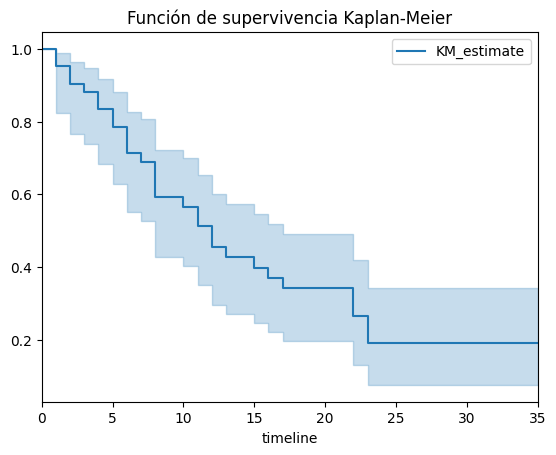

In [7]:
# Vamos a ver la gráfica de la función de supervivencia
km1.plot_survival_function()
plt.title('Función de supervivencia Kaplan-Meier')
plt.xlim(0,35);

In [8]:
## Función de supervivencia
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.952381
2.0,0.904762
3.0,0.880952
4.0,0.833333
5.0,0.785714
6.0,0.714286
7.0,0.689655
8.0,0.591133


In [9]:
## Mostrar los valores del IC
km1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.822743,0.987873
2.0,0.765847,0.963148
3.0,0.737342,0.948639
4.0,0.681928,0.916833
5.0,0.628621,0.882248
6.0,0.552081,0.826483
7.0,0.526178,0.806536
8.0,0.426898,0.722754
9.0,0.426898,0.722754


In [10]:
km1.median_survival_time_

12.0

La mediana del tiempo de supervivencia es 12 semanas, significa que la mitad de las relaciones han terminado en la semana 12 o la mitad de las relaciones duran más de 12 semanas. 

La variable tratamiento toma dos valores 0 y 1. 1 si son detallistas, 0 si no lo son.

In [11]:
## Separamos la base de datos por el tratamiento en detallistas y no detallistas
detallistas=relacion.query('tratamiento==1')
no_deta=relacion.query('tratamiento==0')

In [12]:
## Función de Kaplan-Meier de los detallistas
km_d=KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
## Función de Kaplan-Meier de los no detallistas
km_nd=KaplanMeierFitter().fit(no_deta['t'],no_deta['estado'])

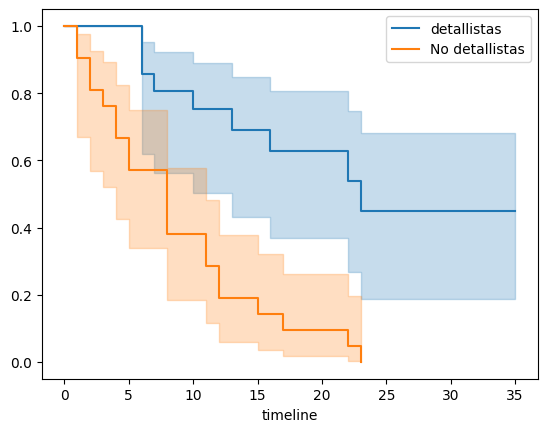

In [13]:
km_d.plot_survival_function(label='detallistas')
km_nd.plot_survival_function(label='No detallistas');

Si los intervalos de confianza se intersectan, significa que las funciones de supervivencia pueden ser iguales.

## Prueba de hipótesis (long-rank-test)

$Ho: S(1)=S(2)$

$Ha: S(1)\neq S(2)$

In [14]:
from lifelines.statistics import logrank_test

In [15]:
#Alternativa de la función de supervivencia
LRT=logrank_test(detallistas['t'],no_deta['t'],detallistas['estado'],no_deta['estado'])

In [17]:
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [22]:
LRT.p_value.round(2)

0.0

Debido a que el p-value"<"alfa. Rechazamos H0 con un nivel de confianza del 95%, las funiones de supervivencia son diferentes. Por lo que podemos concluir que la relación de los detallistas dura más que la de los no detallistas.

In [23]:
km_d.median_survival_time_

23.0

In [24]:
km_nd.median_survival_time_

8.0

La mitad de las relaciones de los detallistas duran más de 23 semanas y de los no detallistas duran menos de 8 semanas.